In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PlotSettings import MainColor1, MainColor2, MainColor3, BackgroundColor3, BackgroundColor1, BackgroundColor2, Gray1, Gray2
from CrossSections import  sigmaV_to_ZZ_Approx, Transfer_sigma
from Constants import DensityFactor, Mp, mm

from scipy.integrate import quad, odeint
from scipy import misc, special, optimize

import matplotlib.patches as mpatches

def sigmatransfer(V, mphi, mchi, alphax):
    w = 300 * (mphi / 10) * (10 / mchi)
    st = (275.73) * (alphax / 1e-2) ** 2 * (mchi / 10) * (10 / mphi) ** (4)
    sv = 2 * st * (w ** 4 / V ** 4) * (2 * np.log(1.0 + V ** 2 / (2 * w ** 2)) - np.log(1.0 + V ** 2 / (w ** 2)))
    return sv


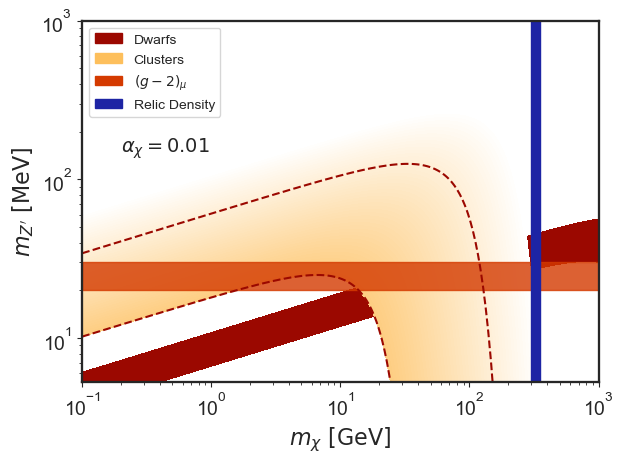

In [42]:
gp_l = (0.3, 8e-2)  

g_p = 200 #Grid Points
M_l = np.logspace(np.log10(5.3), 3, g_p)
m_l = np.logspace(-1, 3, g_p)

#Grids
M_g, m_g = np.meshgrid(M_l, m_l)
sigma_grid_dwarf = np.zeros((g_p, g_p))
sigma_grid_clusters = np.zeros((g_p, g_p))

n = 50
levels_dw=[10, 70]
levels_cl= np.logspace(-3, 0.1, n+1)  # Generate logarithmically spaced values

#Colors
clusterColors = BackgroundColor3
DwColors =MainColor1
Muoncolors = MainColor3
RelicColors = MainColor2

alphaDM = 0.01

patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
patch_g2 = mpatches.Patch(color=Muoncolors, label=r'$(g-2)_{\mu}$')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2

c2 = clusterColors  # yellow
c1 = (1, 1, 1)  # white
clf = [colorFader(c1, c2, (np.log10(l) + 3)/4) for l in levels_cl]

for g in gp_l:
    
    for i in range(g_p):
        for j in range(g_p):
            sigma_grid_dwarf[i, j] = sigmatransfer(10, M_l[j], m_l[i], alphaDM)
            sigma_grid_clusters[i, j] = sigmatransfer(1000, M_l[j], m_l[i], alphaDM)


plt.contourf(m_g, M_g, sigma_grid_dwarf, levels_dw, colors=(DwColors,))
plt.contourf(m_g, M_g, sigma_grid_clusters, levels_cl, colors=clf)
plt.contour(m_g, M_g, sigma_grid_clusters, [0.01, levels_cl[-1] ], colors=(DwColors,), linestyles='dashed')

plt.xscale('log')
plt.yscale('log')  

plt.text(0.2, 150, r'$\alpha_{{\chi}} = {}$'.format(alphaDM), fontsize=14)
plt.fill_between(m_l, y1=20, y2=30, color=Muoncolors, alpha=0.8)

#Relic Density
plt.fill_between(([300, 350]), y1=M_l[0], y2=M_l[-1], color=RelicColors)


plt.xlabel('$m_{\chi} ~[\mathrm{GeV} ]$' )
plt.ylabel('$m_{Z\'} ~[\mathrm{MeV} ]$' )
    
plt.legend(handles=[patch_dw, patch_cl, patch_g2, patch_Oh2], loc='upper left')


plt.tight_layout()
plt.savefig("Plots/ParameterSpacePlot.pdf")
plt.savefig("Plots/ParameterSpacePlot.svg")
plt.show()

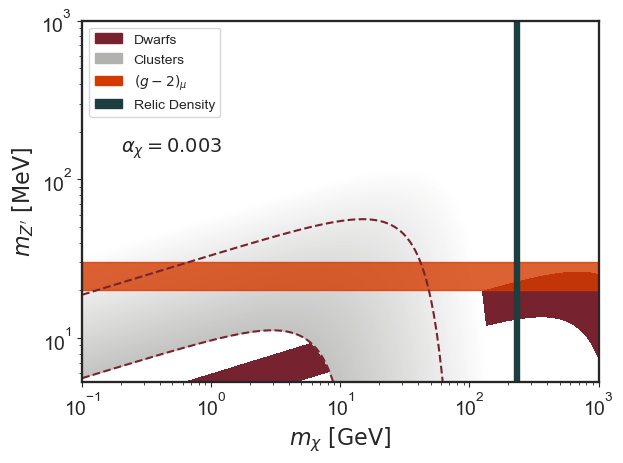

In [23]:
gp_l = (0.3, 8e-2)  

g_p = 200 #Grid Points
M_l = np.logspace(np.log10(5.3), 3, g_p)
m_l = np.logspace(-1, 3, g_p)

#Grids
M_g, m_g = np.meshgrid(M_l, m_l)
sigma_grid_dwarf = np.zeros((g_p, g_p))
sigma_grid_clusters = np.zeros((g_p, g_p))

n = 50
levels_dw=[10, 70]
levels_cl= np.logspace(-3, 0.1, n+1)  # Generate logarithmically spaced values

#Colors
clusterColors = Gray2
DwColors =BackgroundColor1
Muoncolors = MainColor3
RelicColors = BackgroundColor2

alphaDM = 0.003

patch_dw = mpatches.Patch(color=DwColors, label=r'Dwarfs')
patch_cl = mpatches.Patch(color=clusterColors, label=r'Clusters')
patch_g2 = mpatches.Patch(color=Muoncolors, label=r'$(g-2)_{\mu}$')
patch_Oh2 = mpatches.Patch(color=RelicColors, label=r'Relic Density')

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(c1)
    c2=np.array(c2)
    return (1-mix)*c1 + mix*c2

c2 = clusterColors  # yellow
c1 = (1, 1, 1)  # white
clf = [colorFader(c1, c2, (np.log10(l) + 3)/4) for l in levels_cl]


for g in gp_l:
    
    for i in range(g_p):
        for j in range(g_p):
            sigma_grid_dwarf[i, j] = sigmatransfer(10, M_l[j], m_l[i], alphaDM)
            sigma_grid_clusters[i, j] = sigmatransfer(1000, M_l[j], m_l[i], alphaDM)


plt.contourf(m_g, M_g, sigma_grid_dwarf, levels_dw, colors=(DwColors,))
plt.contourf(m_g, M_g, sigma_grid_clusters, levels_cl, colors=clf)
plt.contour(m_g, M_g, sigma_grid_clusters, [0.01, levels_cl[-1] ], colors=(DwColors,), linestyles='dashed')

plt.xscale('log')
plt.yscale('log')  

plt.text(0.2, 150, r'$\alpha_{{\chi}} = {}$'.format(alphaDM), fontsize=14)
plt.fill_between(m_l, y1=20, y2=30, color=Muoncolors, alpha=0.8)
plt.xlabel('$m_{\chi} ~[\mathrm{GeV} ]$' )
plt.ylabel('$m_{Z\'} ~[\mathrm{MeV} ]$' )
    
plt.legend(handles=[patch_dw, patch_cl, patch_g2, patch_Oh2], loc='upper left')



#Relic Density
plt.fill_between(([220, 240]), y1=M_l[0], y2=M_l[-1], color=RelicColors)


plt.tight_layout()
plt.savefig("Plots/ParameterSpacePlot2.pdf")
plt.savefig("Plots/ParameterSpacePlot2.svg")
plt.show()


In [24]:
np.sqrt(4*np.pi*0.003)

0.19416259125556992